Init


In [1]:
import os
import pandas as pd

In [4]:

DATA_PATH=r".\data\SalesAnalysis\Sales_Data"
lst = os.listdir(DATA_PATH)
df=pd.DataFrame()
for f in lst:
    x = pd.read_csv(os.path.join(DATA_PATH, f))
    df = pd.concat([df,x], axis=0)
    
# df.describe()

Data Cleanup

drop empty lines

In [5]:
df.dropna(inplace=True)
# all_data[all_data['Order ID'].isna()]

cleanup rows with headers from the data

In [6]:
df = df.loc[df['Order ID'] != 'Order ID']


convert order date to date format - add month column for easier handling

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df['Month'] = df['Order Date'].dt.to_period('M')

In [9]:
df['Total Sales'] = pd.to_numeric(df['Quantity Ordered']) * pd.to_numeric(df['Price Each'])

In [10]:
df.to_csv(r'.\out\sales_data_cleaned.csv')

In [2]:
sales = pd.read_csv(r'.\out\sales_data_cleaned.csv')

### Create city column

In [3]:
def get_city(x):
    # x = '917 1st St, Dallas, TX 75001'
    x_lst = x.split(',')
    city = x_lst[1]+'-' + x_lst[2][1:3]
    
    return city 

sales['City']  = sales['Purchase Address'].apply(get_city)

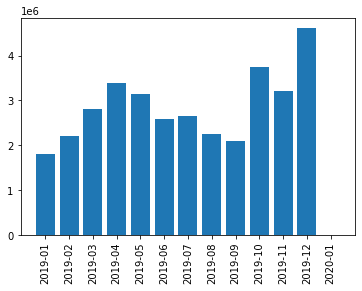

In [4]:
import  matplotlib.pyplot as plt

results=sales.groupby(['Month']).sum().sort_values(by=['Month'])
months = sales['Month'].unique()
months.sort()
# months.sort()
# months = range(1,14)
plt.bar(months, results['Total Sales'])
plt.xticks(months, rotation=90)
plt.show()

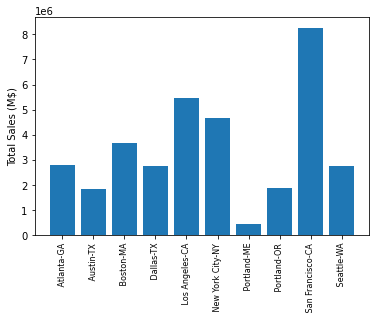

In [15]:
results=sales.groupby(['City']).sum().sort_values(by=['City'])
cities= sales['City'].unique()
cities.sort()
plt.bar(cities, results['Total Sales'])
plt.xticks(cities, rotation=90, size=8)
plt.ylabel('Total Sales (M$)')
plt.show()

Plot orders by hours of the day

In [16]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Hour']=sales['Order Date'].dt.hour

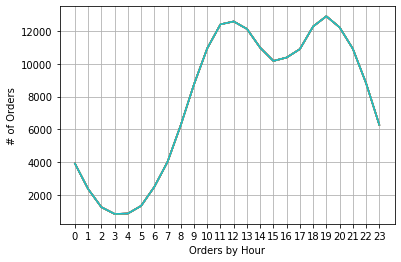

In [17]:
hours = [h for h, df in sales.groupby (['Hour'])]

results=sales.groupby(['Hour']).count()
plt.plot(hours, results)

plt.xticks(hours)
plt.grid()
plt.xlabel('Orders by Hour')
plt.ylabel('# of Orders')
plt.show()

Which Prodcuts are ordered together?

In [5]:
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019-04,23.90,Dallas-TX
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019-04,99.99,Boston-MA
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,600.00,Los Angeles-CA
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles-CA
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019-04,11.99,Los Angeles-CA


In [39]:
s = sales.loc[sales['Order ID'] == 141234]
s

,Order ID,Product
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,Google Phone
3,176560,Wired Headphones
4,176561,Wired Headphones
...,...,...
185945,259353,AAA Batteries (4-pack)
185946,259354,iPhone
185947,259355,iPhone
185948,259356,34in Ultrawide Monitor


In [129]:
# sales['Order Count'] =
s =sales['Order ID', 'Product'].groupby(by=['Order ID']).count()
# s['Order Count']= s[s['Product'] > 1 ]
# sales.columns
# s.index
# sales[sales['Order ID'] == s.index]
# s.head(40)

KeyError: ('Order ID', 'Product')